# Car Price Prediction using Machine Learning

#### Table of content
1. Importing libraries
2. Reading dataset
3. Data Preprocessing 
      * Checking missing values
      * Checking for Unique values
4. Exploratory Data Analysis
      * Visualization
      * Looking for extreme high data entry
      * Understanding relationship between features
5. Model Building 
      * Creating dummy variables
      * Feature Importance
      * Linear Regression
      * Support Vector Regressor
      * Random Forest Regressor

**Importing the libraries**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/vehicle-dataset-from-cardekho/car data.csv
/kaggle/input/vehicle-dataset-from-cardekho/CAR DETAILS FROM CAR DEKHO.csv
/kaggle/input/vehicle-dataset-from-cardekho/Car details v3.csv


**Reading the dataset**

In [2]:
data=pd.read_csv("../input/vehicle-dataset-from-cardekho/car data.csv")

**Having a look on the dataset**

In [3]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
data.shape

(301, 9)

**Checking for missing/null values**

In [5]:
data.isnull()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
296,False,False,False,False,False,False,False,False,False
297,False,False,False,False,False,False,False,False,False
298,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False


In [6]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

From the above output cell we can see there is no missing/null values in our dataset

In [7]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


**Cheching for unique values in different coloumns**

In [9]:
print("Fuel type:-", data['Fuel_Type'].unique())
print("Seller:-", data['Seller_Type'].unique())
print("Transmission:-", data['Transmission'].unique())
print("Owner:-", data['Owner'].unique())
print("Year:-",data['Year'].unique())

Fuel type:- ['Petrol' 'Diesel' 'CNG']
Seller:- ['Dealer' 'Individual']
Transmission:- ['Manual' 'Automatic']
Owner:- [0 1 3]
Year:- [2014 2013 2017 2011 2018 2015 2016 2009 2010 2012 2003 2008 2006 2005
 2004 2007]


**Importing libraries for visualization**

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:xlabel='Year', ylabel='count'>

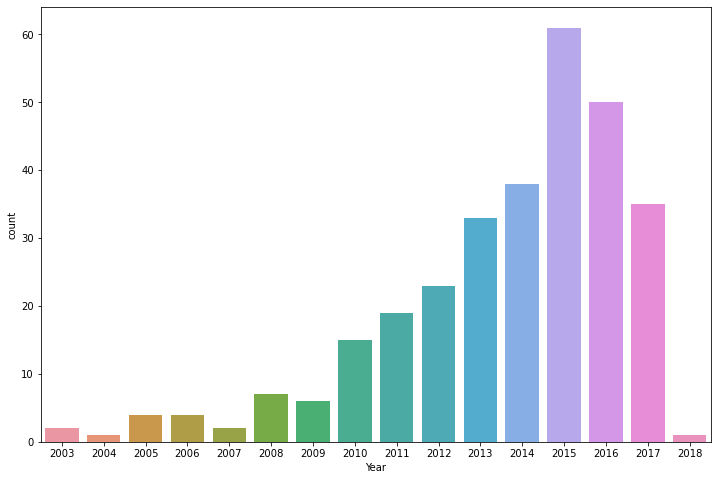

In [11]:
plt.figure(figsize=[12,8])
sns.countplot(x='Year',data=data)

#####  **The above Countplot shows the Number of cars for each year**

**Adding a new coloum to our dataset called vehicle_age**

In [12]:
data['Vehicle_age']=2021-data['Year']

**Droping the year coloum from our dataset**

In [13]:
data.drop(['Year'],axis=1,inplace=True)

In [14]:
data.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Vehicle_age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


### **Exploratory Data Analysis**

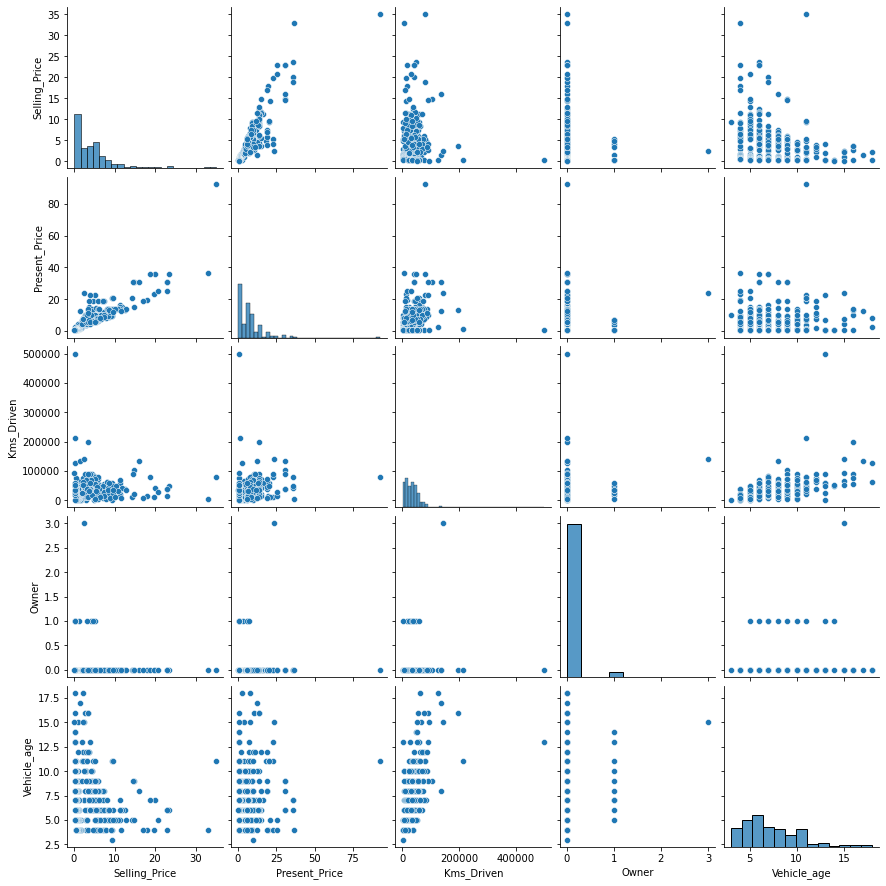

In [15]:
sns.pairplot(data)

**Plotting countplot for varius features**

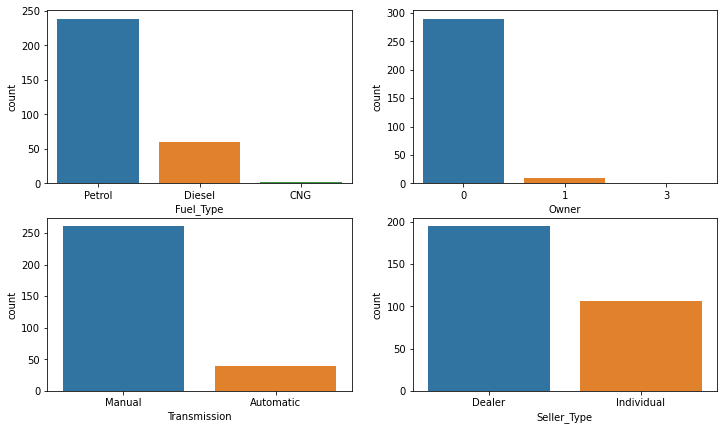

In [16]:
plt.figure(figsize=[12,7])
plt.subplot(2,2,1)
sns.countplot(x='Fuel_Type',data=data)
plt.subplot(2,2,2)
sns.countplot(x='Owner',data=data)

plt.subplot(2,2,3)
sns.countplot(x='Transmission',data=data)
plt.subplot(2,2,4)
sns.countplot(x='Seller_Type',data=data)
plt.show()

From the above count plots we can get to know various information like:-<br>
i) How many petrol,disesl and cng cars are there.<br>
ii) Number of cars for different Owners.<br>
iii) How many manual and automatic cars are there.<br>
iv) Count of numbers of sellers type.

**Plotting boxplots for different features**

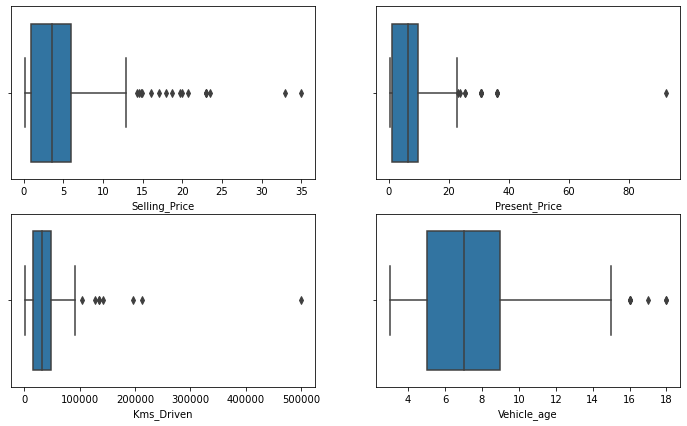

In [17]:
plt.figure(figsize=[12,7])
plt.subplot(2,2,1)
sns.boxplot(x='Selling_Price',data=data)
plt.subplot(2,2,2)
sns.boxplot(x='Present_Price',data=data)

plt.subplot(2,2,3)
sns.boxplot(x='Kms_Driven',data=data)
plt.subplot(2,2,4)
sns.boxplot(x='Vehicle_age',data=data)
plt.show()

The above graphs provides us with the information like Q1,Median,Q3,Minimum,Maximum value and outliers of different features  

**Having a look on extreme data entry points**

In [18]:
# Cars with  selling price more than 20 lakhs 
data[data['Selling_Price']>20]

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Vehicle_age
51,fortuner,23.00,30.61,40000,Diesel,Dealer,Automatic,0,6
63,fortuner,23.50,35.96,47000,Diesel,Dealer,Automatic,0,6
64,fortuner,33.00,36.23,6000,Diesel,Dealer,Automatic,0,4
82,innova,23.00,25.39,15000,Diesel,Dealer,Automatic,0,4
86,land cruiser,35.00,92.60,78000,Diesel,Dealer,Manual,0,11
93,fortuner,23.00,30.61,40000,Diesel,Dealer,Automatic,0,6
96,innova,20.75,25.39,29000,Diesel,Dealer,Automatic,0,5


In [19]:
# Cars that are driven for more than 1 Lakh Kms.
data[data['Kms_Driven']>100000]

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Vehicle_age
37,800,0.35,2.28,127000,Petrol,Individual,Manual,0,18
50,fortuner,14.90,30.61,104707,Diesel,Dealer,Automatic,0,9
53,fortuner,16.00,30.61,135000,Diesel,Individual,Automatic,0,8
77,corolla,1.50,12.35,135154,Petrol,Dealer,Automatic,0,17
84,innova,3.49,13.46,197176,Diesel,Dealer,Manual,0,16
85,camry,2.50,23.73,142000,Petrol,Individual,Automatic,3,15
179,Honda Karizma,0.31,1.05,213000,Petrol,Individual,Manual,0,11
196,Activa 3g,0.17,0.52,500000,Petrol,Individual,Automatic,0,13


In [20]:
# Cars older than 15 years of age.
data[data['Vehicle_age']>15]

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Vehicle_age
37,800,0.35,2.28,127000,Petrol,Individual,Manual,0,18
39,sx4,2.25,7.98,62000,Petrol,Dealer,Manual,0,18
54,innova,2.75,10.21,90000,Petrol,Individual,Manual,0,16
77,corolla,1.50,12.35,135154,Petrol,Dealer,Automatic,0,17
84,innova,3.49,13.46,197176,Diesel,Dealer,Manual,0,16
92,innova,3.51,13.70,75000,Petrol,Dealer,Manual,0,16
189,Hero Super Splendor,0.20,0.57,55000,Petrol,Individual,Manual,0,16


**Checking relationship between features**

<AxesSubplot:>

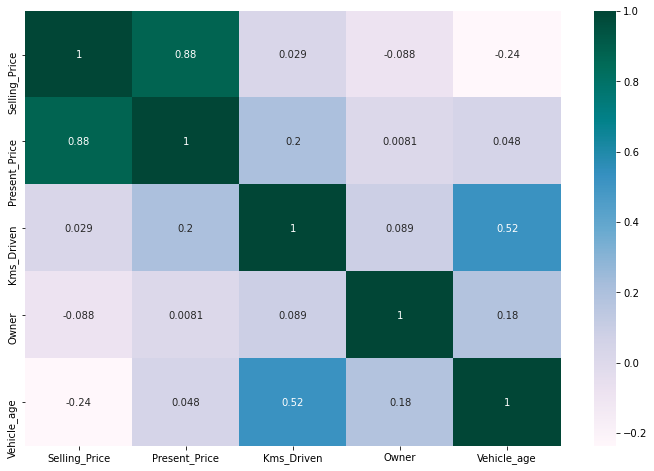

In [21]:
plt.figure(figsize=[12,8])
sns.heatmap(data.corr(),annot=True,cmap='PuBuGn')

**Visualizing selling price relationship with other features**

<AxesSubplot:xlabel='Fuel_Type', ylabel='Selling_Price'>

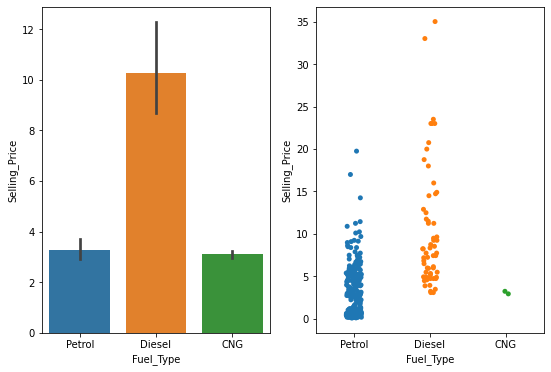

In [22]:
plt.figure(figsize=[9,6])
plt.subplot(1,2,1)
sns.barplot(x='Fuel_Type',y='Selling_Price',data=data)
plt.subplot(1,2,2)
sns.stripplot(x='Fuel_Type',y='Selling_Price',data=data)


**We can say that Diesel cars have higher selling price than Petrol and CNG cars.**

<AxesSubplot:xlabel='Seller_Type', ylabel='Selling_Price'>

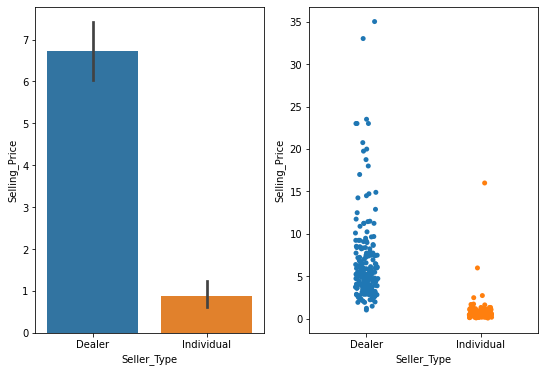

In [23]:
plt.figure(figsize=[9,6])
plt.subplot(1,2,1)
sns.barplot(x='Seller_Type',y='Selling_Price',data=data)
plt.subplot(1,2,2)
sns.stripplot(x='Seller_Type',y='Selling_Price',data=data)

**From the graphs we can infer that the dealers are earning more money than the individual sellers as dealers are getting more selling price.**

<AxesSubplot:xlabel='Transmission', ylabel='Selling_Price'>

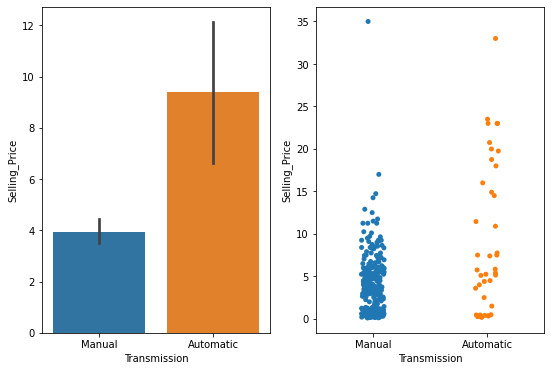

In [24]:
plt.figure(figsize=[9,6])
plt.subplot(1,2,1)
sns.barplot(x='Transmission',y='Selling_Price',data=data)
plt.subplot(1,2,2)
sns.stripplot(x='Transmission',y='Selling_Price',data=data)

**From the above graphs, we can conclude that people prefer Automatic cars over Manual cars hence they have a high selling price.**

<AxesSubplot:xlabel='Owner', ylabel='Selling_Price'>

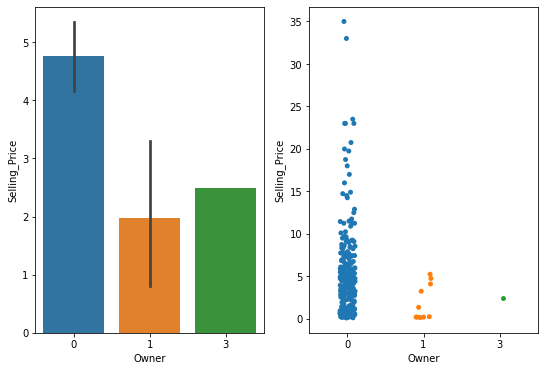

In [25]:
plt.figure(figsize=[9,6])
plt.subplot(1,2,1)
sns.barplot(x='Owner',y='Selling_Price',data=data)
plt.subplot(1,2,2)
sns.stripplot(x='Owner',y='Selling_Price',data=data)

<AxesSubplot:xlabel='Vehicle_age', ylabel='Selling_Price'>

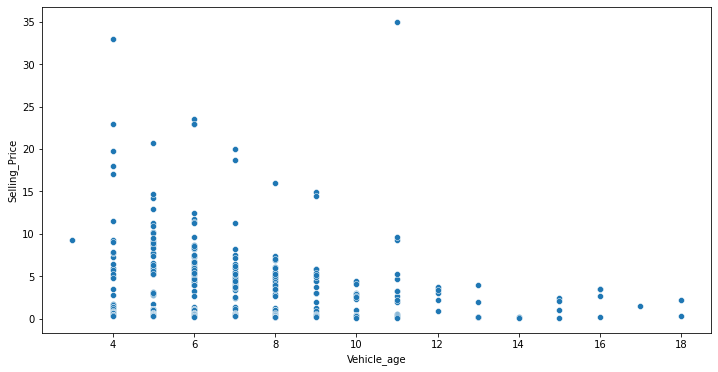

In [26]:
plt.figure(figsize=[12,6])
sns.scatterplot(x='Vehicle_age',y='Selling_Price',data=data)

<AxesSubplot:xlabel='Kms_Driven', ylabel='Selling_Price'>

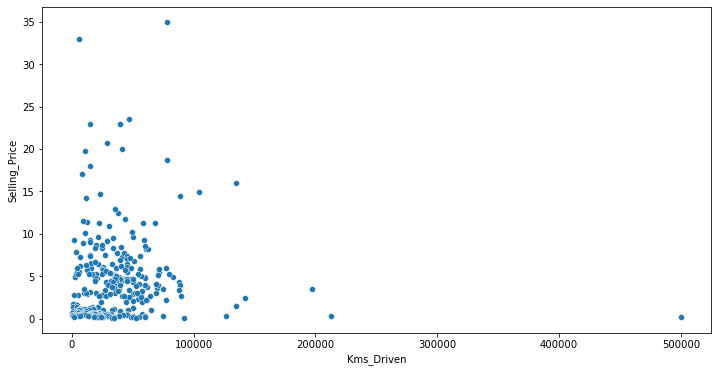

In [27]:
plt.figure(figsize=[12,6])
sns.scatterplot(x='Kms_Driven',y='Selling_Price',data=data)

### **Model Building**

**Creating dummy variables for categorical features**

In [28]:
data.drop(['Car_Name'],inplace=True,axis=1)
data=pd.get_dummies(data,drop_first=True)

In [29]:
data.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Vehicle_age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


In [30]:
x=data.iloc[:,1:]
y=data.iloc[:,0].values

In [31]:
x.head()

,Present_Price,Kms_Driven,Owner,Vehicle_age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,7,0,1,0,1
1,9.54,43000,0,8,1,0,0,1
2,9.85,6900,0,4,0,1,0,1
3,4.15,5200,0,10,0,1,0,1
4,6.87,42450,0,7,1,0,0,1


In [32]:
print(y)

[ 3.35  4.75  7.25  2.85  4.6   9.25  6.75  6.5   8.75  7.45  2.85  6.85
  7.5   6.1   2.25  7.75  7.25  7.75  3.25  2.65  2.85  4.9   4.4   2.5
  2.9   3.    4.15  6.    1.95  7.45  3.1   2.35  4.95  6.    5.5   2.95
  4.65  0.35  3.    2.25  5.85  2.55  1.95  5.5   1.25  7.5   2.65  1.05
  5.8   7.75 14.9  23.   18.   16.    2.75  3.6   4.5   4.75  4.1  19.99
  6.95  4.5  18.75 23.5  33.    4.75 19.75  9.25  4.35 14.25  3.95  4.5
  7.45  2.65  4.9   3.95  5.5   1.5   5.25 14.5  14.73  4.75 23.   12.5
  3.49  2.5  35.    5.9   3.45  4.75  3.8  11.25  3.51 23.    4.    5.85
 20.75 17.    7.05  9.65  1.75  1.7   1.65  1.45  1.35  1.35  1.35  1.25
  1.2   1.2   1.2   1.15  1.15  1.15  1.15  1.11  1.1   1.1   1.1   1.05
  1.05  1.05  1.05  1.    0.95  0.9   0.9   0.75  0.8   0.78  0.75  0.75
  0.75  0.72  0.65  0.65  0.65  0.65  0.6   0.6   0.6   0.6   0.6   0.6
  0.6   0.6   0.55  0.55  0.52  0.51  0.5   0.5   0.5   0.5   0.5   0.48
  0.48  0.48  0.48  0.45  0.45  0.45  0.45  0.45  0.45 

In [33]:
#Feature Importance
from sklearn.ensemble import ExtraTreesRegressor
etr=ExtraTreesRegressor()
etr.fit(x,y)

ExtraTreesRegressor()

In [34]:
print(etr.feature_importances_)

[4.00595891e-01 4.49752226e-02 3.71619108e-04 7.84529393e-02
 2.02927199e-01 1.76550035e-02 1.30735395e-01 1.24286731e-01]


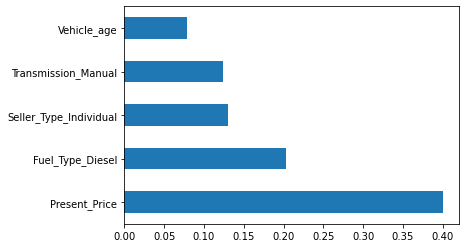

In [35]:
#plotting important feature
imp=pd.Series(etr.feature_importances_,index=x.columns)
imp.nlargest(5).plot(kind='barh')
plt.show()

**Train Test Split**

In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

### Linear regression 

In [37]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [38]:
# predicting value using linear regression
y_pred=lr.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))


[[10.57889241  9.65      ]
 [ 0.71754255  0.45      ]
 [ 4.23613904  4.75      ]
 [ 5.17855444  3.1       ]
 [ 9.75533583 11.45      ]
 [ 4.20615652  4.5       ]
 [ 2.6748089   2.95      ]
 [ 7.63221623  6.5       ]
 [ 0.17032381  0.27      ]
 [ 5.13283747  6.1       ]
 [ 6.15727726  6.7       ]
 [ 6.44545506  4.75      ]
 [ 2.11900126  0.35      ]
 [ 7.6644102   8.4       ]
 [ 1.91710055  2.55      ]
 [ 1.71680788  0.72      ]
 [ 2.02672159  0.75      ]
 [ 1.85294787  0.48      ]
 [ 9.56717323 11.25      ]
 [ 4.23076317  4.        ]
 [ 1.48724915  1.15      ]
 [ 9.36189904  8.25      ]
 [ 1.46103587  0.45      ]
 [ 9.54572517 10.9       ]
 [ 0.82954545  0.5       ]
 [ 8.32266051  7.45      ]
 [ 1.53698563  0.6       ]
 [-3.16293717  0.2       ]
 [ 4.2127377   2.9       ]
 [ 2.10385587  2.85      ]
 [ 3.42279444  0.45      ]
 [ 3.71284702  2.75      ]
 [ 5.54538889  5.25      ]
 [ 7.6834828   9.7       ]
 [-1.89757368  0.2       ]
 [ 7.06591847  5.95      ]
 [ 8.46027656  8.35      ]
 

Text(0.5, 1.0, 'Linear Regression Model')

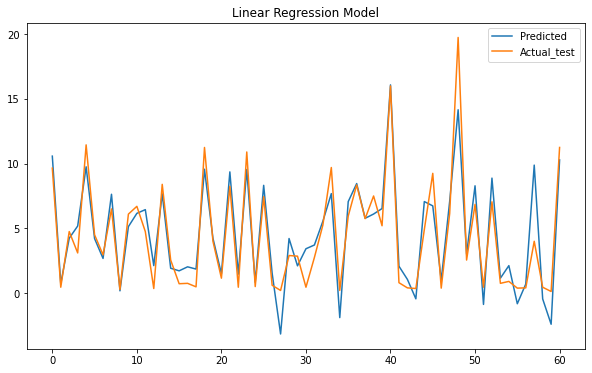

In [39]:
plt.figure(figsize=[10,6])
plt.plot(y_pred,label='Predicted')
plt.plot(y_test,label="Actual_test")
plt.legend()
plt.title("Linear Regression Model")

In [40]:
from sklearn.metrics import r2_score
lr_r2=r2_score(y_test, y_pred)
print(lr_r2)

0.8502332355855594


### support vector regressor


In [41]:
# Feature scalling
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
sc_y=StandardScaler()
x_train_scaled=sc_x.fit_transform(x_train)
y_train=y_train.reshape(len(y_train),1)
y_train_scaled=sc_y.fit_transform(y_train)

In [42]:
print(x_train_scaled)

[[ 0.17670223 -0.54401039 -0.18569534 ...  0.48694291 -0.71374643
   0.3992747 ]
 [-0.48181541 -0.511331    3.52821143 ...  0.48694291  1.4010578
   0.3992747 ]
 [-0.46521412 -0.85676108 -0.18569534 ...  0.48694291 -0.71374643
   0.3992747 ]
 ...
 [ 1.19602114  0.43853559 -0.18569534 ...  0.48694291 -0.71374643
   0.3992747 ]
 [ 0.33054081  0.12590514 -0.18569534 ... -2.05362881 -0.71374643
   0.3992747 ]
 [-0.78285205 -0.61954091 -0.18569534 ...  0.48694291  1.4010578
   0.3992747 ]]


In [43]:
print(y_train_scaled)

[[ 8.32758773e-01]
 [-6.42273432e-01]
 [-3.56783327e-01]
 [-8.04051157e-01]
 [-6.13724421e-01]
 [-4.23397685e-01]
 [-6.80338779e-01]
 [-7.85018484e-01]
 [-7.56469473e-01]
 [-8.07857692e-01]
 [-1.85489265e-01]
 [ 2.38701448e-02]
 [-7.94534820e-01]
 [-3.75816001e-01]
 [-2.37115392e-02]
 [-8.07857692e-01]
 [-6.42273432e-01]
 [ 5.09203322e-01]
 [-4.27442128e-02]
 [ 1.28549850e-01]
 [-2.34974216e-01]
 [-3.47266991e-01]
 [ 1.00000839e-01]
 [-6.80338779e-01]
 [-8.04051157e-01]
 [-3.56783327e-01]
 [-5.28077390e-01]
 [-4.27442128e-02]
 [-6.89855116e-01]
 [-4.27442128e-02]
 [ 2.90327575e-01]
 [ 7.33550962e-02]
 [-6.70822442e-01]
 [ 5.38156777e+00]
 [-4.70979369e-01]
 [ 1.76131534e-01]
 [-4.70979369e-01]
 [-2.80652633e-01]
 [-4.23397685e-01]
 [ 1.28954294e+00]
 [-7.75502147e-01]
 [-3.28234317e-01]
 [-8.42116504e-01]
 [-6.23240758e-01]
 [ 1.55600037e+00]
 [-3.37750654e-01]
 [-8.61149178e-01]
 [-4.27442128e-02]
 [ 1.81294146e+00]
 [-8.23083831e-01]
 [-8.23083831e-01]
 [-6.61306105e-01]
 [ 3.8549094

In [44]:
from sklearn.svm import SVR
svr=SVR(kernel='rbf')
svr.fit(x_train_scaled,y_train_scaled)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR()

In [45]:
#predicting values
y_pred=sc_y.inverse_transform(svr.predict(sc_x.transform(x_test)))
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 8.67875632  9.65      ]
 [ 0.5444014   0.45      ]
 [ 4.21796967  4.75      ]
 [ 3.11798917  3.1       ]
 [ 8.58826108 11.45      ]
 [ 4.44414213  4.5       ]
 [ 3.17434638  2.95      ]
 [ 6.90226486  6.5       ]
 [ 0.37525319  0.27      ]
 [ 5.47078354  6.1       ]
 [ 6.95519108  6.7       ]
 [ 4.95358668  4.75      ]
 [ 0.45828276  0.35      ]
 [ 8.76223324  8.4       ]
 [ 2.04536798  2.55      ]
 [ 1.10020129  0.72      ]
 [ 1.1748531   0.75      ]
 [ 1.02167328  0.48      ]
 [ 9.12451706 11.25      ]
 [ 4.13039872  4.        ]
 [ 1.22944732  1.15      ]
 [ 8.78506083  8.25      ]
 [ 0.80898914  0.45      ]
 [ 8.50032091 10.9       ]
 [ 0.70233083  0.5       ]
 [ 7.7839875   7.45      ]
 [ 0.86389388  0.6       ]
 [ 1.13471049  0.2       ]
 [ 4.13648658  2.9       ]
 [ 2.67406123  2.85      ]
 [ 0.92564787  0.45      ]
 [ 3.58094688  2.75      ]
 [ 5.99538713  5.25      ]
 [ 8.8524898   9.7       ]
 [ 0.39840555  0.2       ]
 [ 5.563907    5.95      ]
 [ 8.37879073  8.35      ]
 

Text(0.5, 1.0, 'Support Vector Regressor Model')

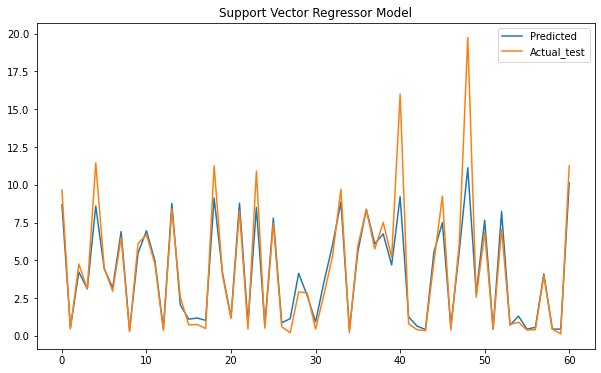

In [46]:
plt.figure(figsize=[10,6])
plt.plot(y_pred,label='Predicted')
plt.plot(y_test,label="Actual_test")
plt.legend()
plt.title("Support Vector Regressor Model")

In [47]:
svr_r2=r2_score(y_test, y_pred)
print(svr_r2)

0.8606360462605934


### Random Forest 

In [48]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()


In [49]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators=[100,200,300,400,500,600,700,800,900,1000,1100,1200]
max_features=['auto','sqrt']
max_depth=[5,10,15,20,25,30]
min_samples_split=[2,5,10,15,100]
min_samples_leaf=[1,2,5,10,12]

In [50]:
# creating random grid
random_grid={'n_estimators': n_estimators,'max_features': max_features,
            'max_depth': max_depth,'min_samples_split': min_samples_split,
            'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10, 12]}


In [51]:
rfr_random = RandomizedSearchCV(estimator = rfr, param_distributions = random_grid, n_iter = 10, cv = 6, verbose=2, random_state=14, n_jobs = 1)


In [52]:
rfr_random.fit(x,y)

Fitting 6 folds for each of 10 candidates, totalling 60 fits
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=12, max_features=auto, max_depth=25 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=12, max_features=auto, max_depth=25, total=   0.7s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=12, max_features=auto, max_depth=25 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=12, max_features=auto, max_depth=25, total=   0.7s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=12, max_features=auto, max_depth=25 
[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=12, max_features=auto, max_depth=25, total=   0.8s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=12, max_features=auto, max_depth=25 
[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=12, max_features=auto, max_depth=25, total=   0.7s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=12, max_features=auto, max_depth=25 
[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=12, max_features=auto, max_depth=25, total=   0.7s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=12, max_features=auto, max_depth=25 
[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=12, max_features=auto, max_depth=25, total=   0.8s
[CV] n_estimators=100, min_samples

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  1.3min finished


RandomizedSearchCV(cv=6, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10, 12],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=14, verbose=2)

In [53]:
rfr_random.best_params_

{'n_estimators': 900,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 15}

In [54]:
rfr_random.best_score_

-0.5821589428961734

In [55]:
y_pred=rfr_random.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 7.81694731  9.65      ]
 [ 0.52847306  0.45      ]
 [ 4.2044278   4.75      ]
 [ 3.42317405  3.1       ]
 [10.8463414  11.45      ]
 [ 4.76146577  4.5       ]
 [ 3.18389506  2.95      ]
 [ 6.79049249  6.5       ]
 [ 0.27428455  0.27      ]
 [ 5.79838989  6.1       ]
 [ 7.29056323  6.7       ]
 [ 4.36264991  4.75      ]
 [ 0.35482906  0.35      ]
 [ 9.49709652  8.4       ]
 [ 2.5681433   2.55      ]
 [ 0.73959292  0.72      ]
 [ 0.70907144  0.75      ]
 [ 0.44483996  0.48      ]
 [10.35875058 11.25      ]
 [ 4.30290795  4.        ]
 [ 1.22678403  1.15      ]
 [ 8.26864643  8.25      ]
 [ 0.44255279  0.45      ]
 [10.18509364 10.9       ]
 [ 0.56354176  0.5       ]
 [ 7.37124548  7.45      ]
 [ 0.63401005  0.6       ]
 [ 0.1875381   0.2       ]
 [ 3.00222049  2.9       ]
 [ 2.70758043  2.85      ]
 [ 0.44396975  0.45      ]
 [ 3.00307178  2.75      ]
 [ 5.8164632   5.25      ]
 [ 9.6674296   9.7       ]
 [ 0.30339239  0.2       ]
 [ 5.39004874  5.95      ]
 [ 8.13191302  8.35      ]
 

Text(0.5, 1.0, 'Random Forest Regressor Model')

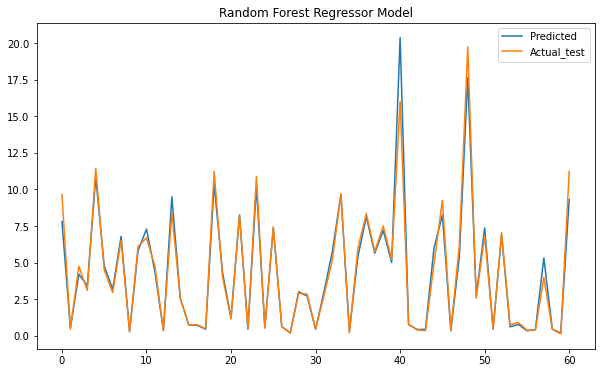

In [56]:
plt.figure(figsize=[10,6])
plt.plot(y_pred,label='Predicted')
plt.plot(y_test,label="Actual_test")
plt.legend()
plt.title("Random Forest Regressor Model")

In [57]:
rfr_r2=r2_score(y_test, y_pred)
print(rfr_r2)

0.9636756600167484


In [58]:
# comparing models R^2 
model=["Linear Regression","SupportVectorRegressor","RandomForestRegressor"]
values=[lr_r2,svr_r2,rfr_r2]
table=pd.DataFrame({"Models":model,"R squared":values})
display(table)

,Models,R squared
0,Linear Regression,0.850233
1,SupportVectorRegressor,0.860636
2,RandomForestRegressor,0.963676
